<a href="https://colab.research.google.com/github/rajsingh018/Multilayer_Perceptron/blob/main/Car_MLP/car_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [22]:
car=pd.read_csv('car.csv')

In [23]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [24]:
car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In [25]:
car.describe()

,buying,maint,doors,persons,lug_boot,safety,classes
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [26]:
X = car[car.columns[:-1]]

In [27]:
y = car['classes']

In [28]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [29]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: classes, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classes', ylabel='count'>

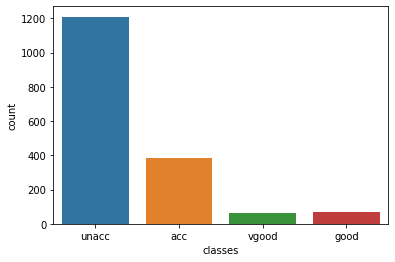

In [30]:
sns.countplot(car['classes'])

In [31]:
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: classes, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
for i in car.columns:
  car[i]=le.fit_transform(car[i])

In [35]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [36]:
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: classes, dtype: int64

In [37]:
car.to_csv('new_data.xlsv',index=True)

In [38]:
car.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
car.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
car.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
car.persons.replace(('2','4','more'),(1,2,3), inplace=True)
car.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
car.safety.replace(('low','med','high'),(1,2,3), inplace=True)
car.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [39]:
X=car.iloc[:,0:6]
y = car.iloc[:,6]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
mlp=MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [42]:
mlp.fit(X_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [43]:
predictions=mlp.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm_ann = confusion_matrix(y_test, predictions)
cm_ann


array([[105,   0,   5,   1],
       [  1,  21,   0,   0],
       [ 19,   2, 347,   0],
       [  0,   0,   0,  18]])

In [46]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(1.0, 0.8333333333333334)

In [48]:
from sklearn.metrics import accuracy_score
predicted= mlp.predict(X_test)
accuracy_score(predicted,y_test)

0.9460500963391136

In [50]:
df_output=pd.DataFrame()

In [51]:
df_output['classes']=predictions

In [52]:
df_output.head()

,classes
0,2
1,0
2,2
3,2
4,2


In [58]:
df_output[['classes']].to_csv(r'new_data.xlsv',index=False)

In [64]:
new_data=pd.read_csv('new_data.xlsv')

In [65]:
new_data

,classes
0,2
1,0
2,2
3,2
4,2
...,...
514,0
515,2
516,2
517,2
